<h1>Prova 1 - Introdução à Ciência dos Dados</h1>
<h3>Daniel Freitas Martins - 2304</h3>

In [642]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import percentileofscore
#from scipy.stats import shapiro # tem limitacao pra 5000 dados
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import random
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [643]:
def lerCSV(caminho_arquivo, header):
    return pd.read_csv(caminho_arquivo, index_col=False, header=header, squeeze=True)

<h2>Lendo dados de "Filmes-Prova01.csv", correspondentes a lista de filmes de quatro plataformas de <i>Streaming</i> (Netflix, Amazon Prime, Disney+ e Hulu)</h2>

In [644]:
df = lerCSV("Filmes-Prova01.csv", header=0)
df.head(3)

,ID,Titulo,Ano,Classificacao_etaria,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Diretores,Generos,Pais,Idioma,Duracao_min
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


<h2>1) Quantos filmes cada uma das 4 plataformas possui? Faça um gráfico de barras para ilustrar esses valores</h2>

Quantidade de filmes em cada plataforma:
	- Netflix: 3560
	- Hulu: 903
	- Amazon Prime: 12354
	- Disney+: 564


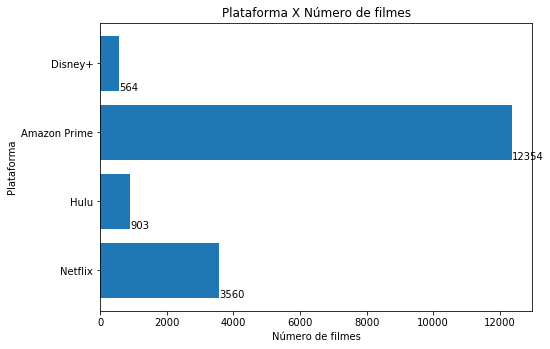

In [645]:
qtd_filmes_netflix = df['Netflix'].sum()
qtd_filmes_hulu = df['Hulu'].sum()
qtd_filmes_amazon = df['Amazon_prime'].sum()
qtd_filmes_disney = df['Disney+'].sum()
print("Quantidade de filmes em cada plataforma:")
print("\t- Netflix:", qtd_filmes_netflix)
print("\t- Hulu:", qtd_filmes_hulu)
print("\t- Amazon Prime:", qtd_filmes_amazon)
print("\t- Disney+:", qtd_filmes_disney)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plataformas = ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+']
qtd_filmes_plataformas = [qtd_filmes_netflix, qtd_filmes_hulu,
                         qtd_filmes_amazon, qtd_filmes_disney]
ax.barh(plataformas, qtd_filmes_plataformas)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Plataforma')
ax.set_xlabel('Número de filmes')
plt.title('Plataforma X Número de filmes')
plt.show()

<h2>2) Quantos filmes estão em mais de uma plataforma?</h2>

In [646]:
qtd = 0
for index, row in df.iterrows(): # iterando sobre todas as linhas
    if(row['Netflix'] == 1): # se tiver em Netflix, avaliar se tem para algum outro
        if(row['Hulu'] == 1 or row['Amazon_prime'] == 1 or row['Disney+'] == 1):
            qtd+=1 # se tiver para Netflix e algum outro, soma 1
            continue # vá para a próxima linha
    if(row['Hulu'] == 1): # se tiver em Hulu, já sabemos que não tem em Netflix
        if(row['Amazon_prime'] == 1 or row['Disney+'] == 1): # avaliando para os restantes
            qtd+=1 # Analogamente, soma-se 1 se tiver para Hulu e outra plataforma
            continue
    if(row['Amazon_prime'] == 1):
        if(row['Disney+'] == 1):
            qtd+=1
            continue
print("Nº de filmes que estão em mais de uma plataforma:", qtd)

Nº de filmes que estão em mais de uma plataforma: 627


<h2>3) Qual a plataforma que possui a maior média de nota IMDb?</h2>

In [647]:
df_filmes_netflix = df[df['Netflix'] == 1]
df_filmes_hulu = df[df['Hulu'] == 1]
df_filmes_amazon = df[df['Amazon_prime'] == 1]
df_filmes_disney = df[df['Disney+'] == 1]

In [648]:
def calcularMediaIMDb(df, nome_plataforma):
    media = df['IMDb'].sum() / len(df)
    print('Média de nota IMDb da plataforma', nome_plataforma, "=", media)
    return media

In [649]:
media_netflix = calcularMediaIMDb(df_filmes_netflix, 'Netflix')
media_hulu = calcularMediaIMDb(df_filmes_hulu, 'Hulu')
media_amazon = calcularMediaIMDb(df_filmes_amazon, 'Amazon Prime')
media_disney = calcularMediaIMDb(df_filmes_disney, 'Disney+')

v = {'Netflix': media_netflix, 'Hulu': media_hulu, 'Amazon Prime': media_amazon, 'Disney+': media_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print("\nA plataforma que possui maior média de nota IMDb é a %s, com uma média de aproximadamente %.2f."%(nome_plat, v[nome_plat]))

Média de nota IMDb da plataforma Netflix = 6.04570224719101
Média de nota IMDb da plataforma Hulu = 6.063344407530454
Média de nota IMDb da plataforma Amazon Prime = 5.562570827262425
Média de nota IMDb da plataforma Disney+ = 6.429964539007092

A plataforma que possui maior média de nota IMDb é a Disney+, com uma média de aproximadamente 6.43.


<h2>4) Qual o percentual de filmes de cada plataforma com nota IMDb maior que 8?</h2>

In [650]:
def calcularPercentualNotaIMDb(df, nome_plataforma, limiar=8):
    qtd = 0
    for index, row in df.iterrows():
        if(row['IMDb'] > 8):
            qtd+=1
    percentual = qtd/len(df)*100
    print('\t-', nome_plataforma, "= {:.2f}%".format(percentual))
    return percentual

In [651]:
print('Percentual de filmes de cada plataforma com nota IMDb maior que 8:')
pnet = calcularPercentualNotaIMDb(df_filmes_netflix, "Netflix")
phul = calcularPercentualNotaIMDb(df_filmes_hulu, "Hulu")
pama = calcularPercentualNotaIMDb(df_filmes_amazon, "Amazon Prime")
pdis = calcularPercentualNotaIMDb(df_filmes_disney, "Disney+")

v = {'Netflix': pnet, 'Hulu': phul, 'Amazon Prime': pama, 'Disney+': pdis}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior percentual de filmes com nota IMDb maior que 8.')

Percentual de filmes de cada plataforma com nota IMDb maior que 8:
	- Netflix = 3.62%
	- Hulu = 2.55%
	- Amazon Prime = 2.62%
	- Disney+ = 3.72%


Disney+ possui um maior percentual de filmes com nota IMDb maior que 8.


<h2>5) Se uma pessoa é uma apreciadora de filmes clássicos antigos, qual plataforma você mais recomenda? Justifique.</h2>

In [652]:
df_antigos = df[df['Ano'] <= 1990]
qtd_antigos_netflix = df_antigos['Netflix'].sum()
qtd_antigos_hulu = df_antigos['Hulu'].sum()
qtd_antigos_amazon = df_antigos['Amazon_prime'].sum()
qtd_antigos_disney = df_antigos['Disney+'].sum()
print("Nº filmes antigos Netflix:", qtd_antigos_netflix)
print("Nº filmes antigos Hulu:", qtd_antigos_hulu)
print("Nº filmes antigos Amazon Prime:", qtd_antigos_amazon)
print("Nº filmes antigos Disney+:", qtd_antigos_disney)

v = {'Netflix': qtd_antigos_netflix, 'Hulu': qtd_antigos_hulu, 'Amazon Prime': qtd_antigos_amazon, 'Disney+': qtd_antigos_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior número de filmes antigos.')

Nº filmes antigos Netflix: 123
Nº filmes antigos Hulu: 52
Nº filmes antigos Amazon Prime: 2881
Nº filmes antigos Disney+: 133


Amazon Prime possui um maior número de filmes antigos.


<p>Considerando-se que os filmes antigos clássicos estão abaixo do ano de 1990 (inclusive), eu recomendaria a plataforma <b>Amazon Prime</b> por possuir um maior número de filmes antigos. Em comparação com Disney+, a Amazon Prime possui 20 vezes mais filmes antigos disponíveis para escolha.</p>

<h2>6) Quantas categorias de classificação etária existem? Faça um gráfico de barras com a quantidade de filmes por classificação etária.</h2>

In [653]:
df_classificacao_unique = df['Classificacao_etaria'].unique
df_classificacao_unique

<bound method Series.unique of 0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Classificacao_etaria, Length: 16744, dtype: object>

<p>Note que existem valores <b>NaN</b>. No entanto, vou considerar para ver também a quantidade de filmes que não possuem a classificação etária informada...</p>

In [654]:
#df_classificacao_unique = df['Classificacao_etaria'].dropna().unique()
df_classificacao_unique = df['Classificacao_etaria'].unique()
df_classificacao_unique

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [655]:
qtd_categorias_classificacao_etaria = len(df_classificacao_unique)
print('- Existem', (qtd_categorias_classificacao_etaria-(1 if pd.isnull(df_classificacao_unique).any() else 0)), 
      'categorias de classificação etária diferentes nesta base de dados.\n')
print('- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.')

- Existem 5 categorias de classificação etária diferentes nesta base de dados.

- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.


In [656]:
dict_somas = dict((el if el is not np.nan else 'Não informado',0) for el in df_classificacao_unique)
for k in dict_somas:
    if(k == 'Não informado'):
        dict_somas[k] = len(df[pd.isnull(df['Classificacao_etaria'])])
    else:
        dict_somas[k] = len(df[df['Classificacao_etaria'] == k])
#for index, row in df.iterrows():
#    dict_somas[row['Classificacao_etaria'] if row['Classificacao_etaria'] is not np.nan else 'Não informado'] += 1
dict_somas

{'13+': 1255,
 '18+': 3474,
 '7+': 1462,
 'Não informado': 9390,
 'all': 843,
 '16+': 320}

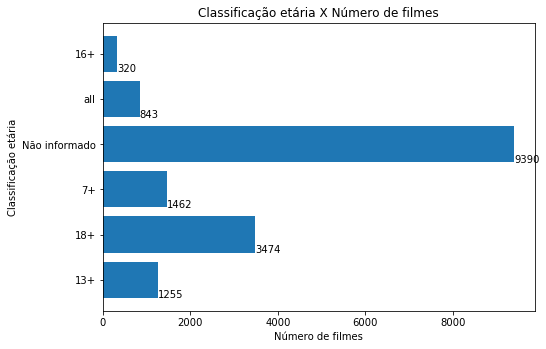

In [657]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
classificacoes_etarias = list(dict_somas)
qtd_filmes = list(dict_somas.values())
ax.barh(classificacoes_etarias, qtd_filmes)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Classificação etária')
ax.set_xlabel('Número de filmes')
plt.title('Classificação etária X Número de filmes')
plt.show()

<p>Note que existe um número muito grande de filmes em que a classificação indicativa não está disponível. Isso pode ser um empecilho na hora de escolher determinados filmes para assistir com toda a família, por exemplo. Das cinco categorias, existem mais filmes adultos (18+) do que os demais.</p>

<h2>7) Qual plataforma você mais indicaria para uma criança? Justifique.</h2>

<p>L8069 - Planalto: Art. 2º Considera-se criança, para os efeitos desta Lei, a pessoa até doze anos de idade incompletos, e adolescente aquela entre doze e dezoito anos de idade. (http://www.planalto.gov.br/ccivil_03/leis/l8069.htm)</p>

In [658]:
df_classificacao = df.groupby('Classificacao_etaria')
df_classificacao_sum = df_classificacao.sum()
df_classificacao_sum

,ID,Ano,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Duracao_min
Classificacao_etaria,,,,,,,,
13+,7854671,2520581,7610.0,383,119,819,40,126263.0
16+,2369560,644328,1759.3,89,17,226,1,29599.0
18+,25150626,6965709,19455.0,752,290,2612,3,331409.0
7+,11777371,2926728,8837.5,323,109,916,179,141755.0
all,8901648,1682715,5135.4,130,55,406,277,74747.0


In [659]:
df_menores = df_classificacao_sum[(df_classificacao_sum.index == '7+') | (df_classificacao_sum.index == 'all')].sum()
qtd_menores_netflix = df_menores['Netflix']
qtd_menores_hulu = df_menores['Hulu']
qtd_menores_amazon = df_menores['Amazon_prime']
qtd_menores_disney = df_menores['Disney+']
print("Nº filmes para crianças Netflix:", qtd_menores_netflix)
print("Nº filmes para crianças Hulu:", qtd_menores_hulu)
print("Nº filmes para crianças Amazon Prime:", qtd_menores_amazon)
print("Nº filmes para crianças Disney+:", qtd_menores_disney)
v = {'Netflix': qtd_menores_netflix, 'Hulu': qtd_menores_hulu, 'Amazon Prime': qtd_menores_amazon, 'Disney+': qtd_menores_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior número de filmes próprios para crianças (menores de 12 anos).')

Nº filmes para crianças Netflix: 453.0
Nº filmes para crianças Hulu: 164.0
Nº filmes para crianças Amazon Prime: 1322.0
Nº filmes para crianças Disney+: 456.0


Amazon Prime possui um maior número de filmes próprios para crianças (menores de 12 anos).


<p>A plataforma Amazon Prime tem um maior número de filmes com classificação indicativa destinada à crianças (menores de 12 anos). No entanto, ela possui um grande número de filmes adultos.</p>
<p>- Caso haja um acompanhamento com os pais ou um controle facilitado pela plataforma, eu recomendaria a Amazon Prime.</p>
<p>- Caso não haja esse acompanhamento com os pais, permitindo que a criança possa assistir e escolher os filmes livremente, eu recomendaria a Disney+, por conter um número razoável de filmes para crianças e poucos filmes destinados aos públicos adolescente e adulto.</p>

<h2>8) Faça um gráfico de linhas com a quantidade de filmes disponíveis por ano de lançamento. Qual o ano que possui mais filmes, e quantos filmes foram lançados nesse ano? Qual a média de lançamento de filmes por ano? Trace uma linha reta no gráfico com a média, e responda em quais anos foram lançados mais filmes do que a média.</h2>

Média de lançamentos de filmes por ano: 153.61


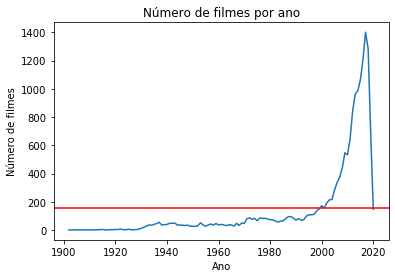

In [660]:
df_anos = df.copy()
df_anos['qtd_filmes'] = 1
df_anos = df_anos.groupby('Ano')
df_anos_sum = df_anos['qtd_filmes'].sum()
ax = df_anos_sum.plot(kind='line')

media_lancamentos = df_anos_sum.agg('mean')
print('Média de lançamentos de filmes por ano: %.2f'%media_lancamentos)

plt.axhline(y=media_lancamentos, color='r', linestyle='-')
plt.title('Número de filmes por ano')
ax.set_ylabel('Número de filmes')
plt.show()

In [661]:
print('Ano que possui mais filmes e o nº de filmes lançados neste ano:')
df_anos_sum.sort_values(ascending=False).head(1)

Ano que possui mais filmes e o nº de filmes lançados neste ano:


Ano
2017    1401
Name: qtd_filmes, dtype: int64

In [662]:
df_anos_acima_media = df_anos_sum[df_anos_sum > media_lancamentos]
print("Quantidade de anos cujos nº de lançamento foram maiores que a média: ", len(df_anos_acima_media))
print('Anos com número de lançamentos maior do que a média:')
print('Ano ','Nº lançamentos')
for k in df_anos_acima_media.keys():
    print(k, df_anos_acima_media[k])


Quantidade de anos cujos nº de lançamento foram maiores que a média:  20
Anos com número de lançamentos maior do que a média:
Ano  Nº lançamentos
2000 172
2001 156
2002 193
2003 214
2004 217
2005 285
2006 338
2007 375
2008 442
2009 548
2010 533
2011 645
2012 843
2013 964
2014 986
2015 1065
2016 1206
2017 1401
2018 1285
2019 689


<p>Apenas para sintetizar a resposta:</p>
<p>- O ano de 2017 teve o maior nº de lançamentos (1401) dentre todos os anos desta base de dados.</p>
<p>- A média de lançamento de filmes por ano foi de aproximadamente 153 filmes por ano.</p>
<p>- Dos anos de 2000 a 2019, 20 anos ao todo, tiveram o nº de lançamentos maiores do que a média.</p>

<h2>9) Faça o Boxplot da duração dos filmes. Em seguida, remova os outliers que achar necessário, e faça o histograma da duração. Ajuste o parâmetro "bins" se necessário, para visualizar melhor. Em seguida,  responda se os valores de duração seguem a distribuição Normal. Justifique.</h2>

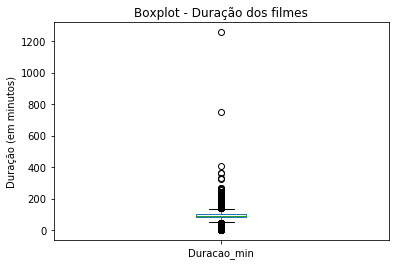

In [663]:
ax = df['Duracao_min'].plot(kind='box')
plt.title('Boxplot - Duração dos filmes')
ax.set_ylabel('Duração (em minutos)')
plt.show()

Nº elementos: 16145


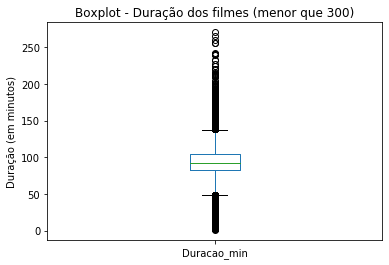

In [664]:
lim = 300
df_duracao_limpo = df[df['Duracao_min'] < lim]['Duracao_min']
ax = df_duracao_limpo.plot(kind='box')
plt.title('Boxplot - Duração dos filmes (menor que %d)'%lim)
ax.set_ylabel('Duração (em minutos)')
print('Nº elementos:', len(df_duracao_limpo))
plt.show()

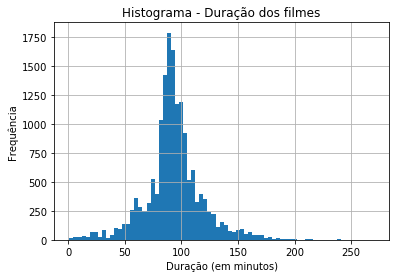

In [665]:
ax = df_duracao_limpo.hist(bins=75)
plt.title('Histograma - Duração dos filmes')
ax.set_ylabel('Frequência')
ax.set_xlabel('Duração (em minutos)')
plt.show()

<p>Pelo histograma acima, é possível observar que os valores de duração <b>parecem seguir uma distribuição normal</b>. Para confirmar matematicamente, podemos usar a função <b>scipy.stats.normaltest</b>, baseada nos testes de D’Agostino e Pearson’s</p>

<p><b>Hipótese nula</b>: Os valores de duração seguem uma distribuição normal.</p>
<p><b>Hipótese alternativa</b>: Os valores de duração não seguem uma distribuição normal.</p>

In [666]:
nt = normaltest(df_duracao_limpo)
print("Normal Test: (statistic, p-value) = {}".format(nt))
k2, p = nt
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("A hipótese nula pode ser rejeitada.")
else:
    print("A hipótese nula não pode ser rejeitada.")

Normal Test: (statistic, p-value) = NormaltestResult(statistic=1545.0770868254453, pvalue=0.0)
A hipótese nula pode ser rejeitada.


<p>Note que o p-value obtido pela função normaltest é bem pequeno. De acordo com [1] e [2], se este valor é bem próximo de zero, então a hipótese nula pode ser rejeitada a 0,1% de grau de confiança, sendo <b>improvável que estes dados sigam uma distribuição normal</b>.</p>
<p>Um resultado curioso. A olho nú parece seguir uma distribuição normal, mas matematicamente, não segue.</p>
<p>[1] Scipy. Normaltest. Disponível em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html</p>
<p>[2] Stackoverflow. Scipy Normaltest how is it used? Disponível em: https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used</p>

<h2>10) Quantos gêneros distintos existem? Quantos filmes de cada gênero existem?</h2>

In [667]:
generos = {}
for index, row in df.iterrows():
    if(pd.isnull(row['Generos'])):
        if('NaN' in generos):
            generos['NaN'] += 1
        else:
            generos['NaN'] = 1
        continue
    v = row['Generos'].split(',')
    for k in v:
        if(k in generos):
            generos[k] += 1
        else:
            generos[k] = 1

<p>Considerei os valores ausentes também para contabilizar os filmes que não foram classificados em nenhum gênero. Essa informação pode ser útil para saber como normalizar isto, uma vez que a falta desse tipo de informação é prejudicial nas buscas por determinados filmes que não possuem seus gêneros informados.</p>

In [668]:
print('Existem %d gêneros distintos (excluindo-se os com valores NaN). A quantidade de filmes que cada'%(len(generos) - 1),
      'um possui pode ser visualizada logo abaixo.\n')
print('Existem %d filmes sem nenhum gênero informado (valores NaN / ausentes).\n'%(generos['NaN']))
print("{:<12} {:<20}\n".format('Gênero','Nº filmes'))   
for k in generos:
    print("{:<12} {:<20}".format(k, generos[k]))

Existem 27 gêneros distintos (excluindo-se os com valores NaN). A quantidade de filmes que cada um possui pode ser visualizada logo abaixo.

Existem 275 filmes sem nenhum gênero informado (valores NaN / ausentes).

Gênero       Nº filmes           

Action       2683                
Adventure    1778                
Sci-Fi       1228                
Thriller     3354                
Comedy       4637                
Western      499                 
Animation    711                 
Family       1514                
Biography    821                 
Drama        7227                
Music        667                 
War          539                 
Crime        1833                
Fantasy      1089                
Romance      2359                
History      715                 
Mystery      1274                
Horror       2201                
Sport        404                 
Documentary  2546                
Musical      401                 
News         105                 
Sh

<p>Em resumo, existem 27 gêneros distintos nesta base. O número de filmes que cada gênero possui pode ser visualizado acima.</p>
<p>Além do que foi pedido, foram contabilizados 275 filmes que não possuem nenhum gênero associado. Em sistemas de busca de informação, a falta desta informação pode tornar determinados filmes difíceis de serem encontrados. Saber este valor pode ser interessante para corrigir isso na base de dados.</p>

<h2>11) Qual o diretor possui a melhor media de nota IMDb dos seus filmes?</h2>

In [669]:
#Diretores
diretores = {}
diretores_cont = {}
for index, row in df.iterrows():
    if(pd.isnull(row['Diretores'])):
        if('NaN' in diretores):
            diretores['NaN'] += row['IMDb']
            diretores_cont['NaN'] += 1
        else:
            diretores['NaN'] = row['IMDb']
            diretores_cont['NaN'] = 1
        continue
    v = row['Diretores'].split(',')
    for k in v:
        if(k in diretores):
            diretores[k] += row['IMDb']
            diretores_cont[k] += 1
        else:
            diretores[k] = row['IMDb']
            diretores_cont[k] = 1
for k in diretores:
    diretores[k] = diretores[k] / diretores_cont[k]

In [670]:
diretores_ordenados = {k: v for k, v in sorted(diretores.items(), reverse=True, key=lambda x: x[1])}
print('Imprimindo os 20 diretores com maiores médias de nota IMDb:')
cont = 0
for k in diretores_ordenados:
    cont+=1
    print("{:<25} {:<20}".format(k, diretores_ordenados[k]))
    if(cont >= 20):
        break
print('...')

Imprimindo os 20 diretores com maiores médias de nota IMDb:
Sergio Leone              8.65                
Kevin Booth               8.5                 
Bob Persichetti           8.4                 
Peter Ramsey              8.4                 
Rodney Rothman            8.4                 
Aamir Khan                8.4                 
Amole Gupte               8.4                 
Christopher Nolan         8.3                 
Guillermo del Toro        8.2                 
Sergio Pablos             8.2                 
Carlos Martínez López     8.2                 
Gabriel Clarke            8.2                 
Torquil Jones             8.2                 
Rajkumar Hirani           8.1                 
Josh Lowell               8.1                 
Peter Mortimer            8.1                 
Frank Miller              8.0                 
Gabriele Muccino          8.0                 
Spike Jonze               7.933333333333334   
Nitesh Tiwari             7.9                 


<p>O diretor que possui a melhor média de notas de seus filmes é <b>Sergio Leone</b>, com 8.65 de média.</p>

<h2>12) Utilize regras de associação para responder às seguintes questões:</h2>
<h3>a) Qual o conjunto de itens de gêneros com mais de um gênero que aparece em mais filmes?</h3>

In [671]:
df4 = df.copy().dropna()
df4['qtd_filmes'] = 1
df4 = df4[df4['Generos'].str.contains(',')]
df4 = df4.groupby('Generos')
df4['qtd_filmes'].sum().sort_values(ascending=False).head(3)

Generos
Comedy,Drama            208
Comedy,Drama,Romance    181
Drama,Romance           155
Name: qtd_filmes, dtype: int64

<p>O conjunto de itens de gêneros com mais de um gênero que aparece em mais filmes é: <b>{Comedy, Drama}</b></p>

<h3>b) Qual o percentual de filmes em que esse conjunto de itens aparece?</h3>

In [672]:
p = df4['qtd_filmes'].sum().sort_values(ascending=False).head(1)/len(df)*100 
print('Percentual de filmes em que o conjunto de itens {Comedy, Drama} aparece:')
p

Percentual de filmes em que o conjunto de itens {Comedy, Drama} aparece:


Generos
Comedy,Drama    1.242236
Name: qtd_filmes, dtype: float64

<p>O percentual de filmes que o conjunto {Comedy, Drama} aparece é de <b>1,24%</b>.</p>

<h3>c) Considerando uma pessoa que gosta de filmes de "Crime", quais outros gêneros você recomendaria  a essa pessoa? Justifique sua resposta.</h3>

In [673]:
df2 = df.dropna()
df2 = df2[df2['Generos'].str.contains(',')]
df2 = df2[['Generos']]
for k in generos:
    df2[k] = 0
for i, row in df.iterrows():
    if(pd.isnull(row['Generos'])):
        continue
    v = row['Generos'].split(',')
    for k in v:
        df2.at[i,k] = 1
df2 = df2.drop('Generos', 1)

In [674]:
df3 = df2.copy()
df3 = df3.dropna()
df3.head(15)

,Action,Adventure,Sci-Fi,Thriller,Comedy,Western,Animation,Family,Biography,Drama,...,Sport,Documentary,Musical,News,Short,NaN,Reality-TV,Talk-Show,Game-Show,Film-Noir
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [675]:
frequent_itemsets = apriori(df3, min_support=0.06, use_colnames=True)

In [676]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

In [677]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Action),(Adventure),0.246003,0.182958,0.087936,0.357459,1.953780,0.042928,1.271581
1,(Adventure),(Action),0.182958,0.246003,0.087936,0.480636,1.953780,0.042928,1.451769
2,(Action),(Sci-Fi),0.246003,0.122275,0.061773,0.251108,2.053637,0.031693,1.172032
3,(Sci-Fi),(Action),0.122275,0.246003,0.061773,0.505201,2.053637,0.031693,1.523844
4,(Action),(Thriller),0.246003,0.300145,0.108285,0.440177,1.466547,0.034448,1.250136
5,(Thriller),(Action),0.300145,0.246003,0.108285,0.360775,1.466547,0.034448,1.179548
6,(Action),(Drama),0.246003,0.514535,0.103198,0.419498,0.815295,-0.023379,0.836285
7,(Drama),(Action),0.514535,0.246003,0.103198,0.200565,0.815295,-0.023379,0.943162
8,(Comedy),(Adventure),0.349564,0.182958,0.070858,0.202703,1.107920,0.006902,1.024765
9,(Adventure),(Comedy),0.182958,0.349564,0.070858,0.387289,1.107920,0.006902,1.061571


In [678]:
rules[rules['support'] == rules.support.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Drama),(Thriller),0.514535,0.300145,0.152071,0.295551,0.984692,-0.002364,0.993478
13,(Thriller),(Drama),0.300145,0.514535,0.152071,0.506659,0.984692,-0.002364,0.984035


In [679]:
rules[rules['confidence'] == rules.confidence.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Animation),(Family),0.076853,0.168786,0.061228,0.79669,4.720111,0.048256,4.088411


In [680]:
rules[rules['lift'] == rules.lift.max()]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(Animation),(Family),0.076853,0.168786,0.061228,0.796690,4.720111,0.048256,4.088411
27,(Family),(Animation),0.168786,0.076853,0.061228,0.362756,4.720111,0.048256,1.448654


<p>Observando as regras acima, é possível perceber que pessoas que assistem filmes com o gênero "Crime", também assistem aos filmes de gênero <b>Drama e Thriller</b>. A confiança para com estes valores é de mais de 50% e o número de suporte pode se considerar aceitável para esta análise. Desta forma, eu recomendaria a essa pessoa a assistir filmes de Drama e Thriller.</p>